In [1]:
from causalnex.structure import StructureModel
sm = StructureModel()

In [2]:
sm.add_edges_from([
    ('health', 'absences'),
    ('health', 'G1')
])

In [3]:
sm.edges

OutEdgeView([('health', 'absences'), ('health', 'G1')])

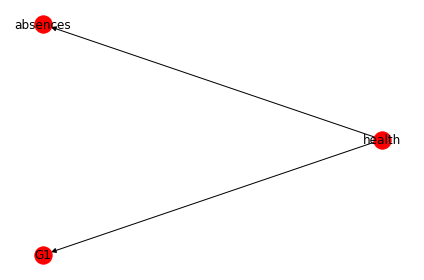

In [5]:
from causalnex.plots import plot_structure

_, _, _ = plot_structure(sm)

In [8]:
import pandas as pd
data = pd.read_csv('student/student-por.csv', delimiter=';')
data.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [9]:
drop_col = ['school','sex','age','Mjob', 'Fjob','reason','guardian']
data = data.drop(columns=drop_col)
data.head(5)

,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,U,GT3,A,4,4,2,2,0,yes,no,...,4,3,4,1,1,3,4,0,11,11
1,U,GT3,T,1,1,1,2,0,no,yes,...,5,3,3,1,1,3,2,9,11,11
2,U,LE3,T,1,1,1,2,0,yes,no,...,4,3,2,2,3,3,6,12,13,12
3,U,GT3,T,4,2,1,3,0,no,yes,...,3,2,2,1,1,5,0,14,14,14
4,U,GT3,T,3,3,1,2,0,no,yes,...,4,3,2,1,2,5,0,11,13,13


In [10]:
import numpy as np
struct_data = data.copy()

non_numeric_columns = list(struct_data.select_dtypes(exclude=[np.number]).columns)
print(non_numeric_columns)

['address', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']


In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in non_numeric_columns:
    struct_data[col] = le.fit_transform(struct_data[col])

struct_data.head(5)

/Users/millengustavo/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/Users/millengustavo/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/millengustavo/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/millengustavo/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,0,0,4,4,2,2,0,1,0,...,4,3,4,1,1,3,4,0,11,11
1,1,0,1,1,1,1,2,0,0,1,...,5,3,3,1,1,3,2,9,11,11
2,1,1,1,1,1,1,2,0,1,0,...,4,3,2,2,3,3,6,12,13,12
3,1,0,1,4,2,1,3,0,0,1,...,3,2,2,1,1,5,0,14,14,14
4,1,0,1,3,3,1,2,0,0,1,...,4,3,2,1,2,5,0,11,13,13


In [12]:
from causalnex.structure.notears import from_pandas
sm = from_pandas(struct_data)

/Users/millengustavo/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/Users/millengustavo/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:660: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


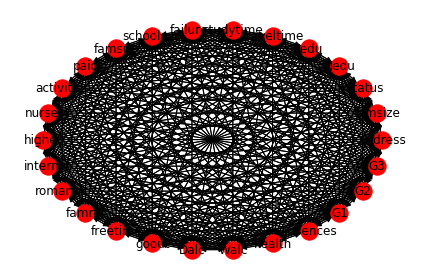

In [13]:
_, _, _ = plot_structure(sm)

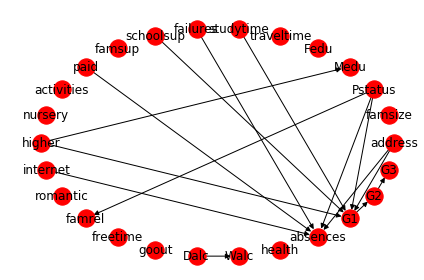

In [14]:
sm.remove_edges_below_threshold(0.8)
_, _, _ = plot_structure(sm)

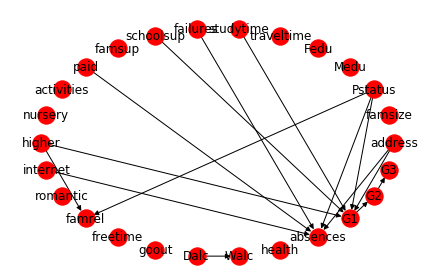

In [15]:
sm = from_pandas(struct_data, tabu_edges=[("higher", "Medu")], w_threshold=0.8)
_, _, _ = plot_structure(sm)

In [16]:
sm.add_edge("failures", "G1")
sm.remove_edge("Pstatus", "G1")
sm.remove_edge("address", "G1")

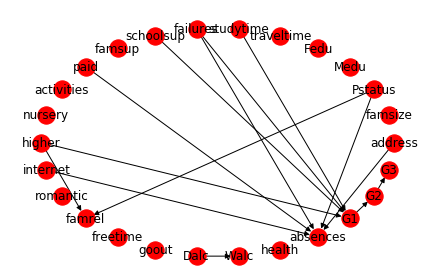

In [17]:
_, _, _ = plot_structure(sm)

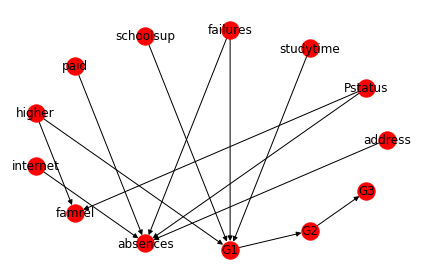

In [18]:
sm = sm.get_largest_subgraph()

_, _, _ = plot_structure(sm)

In [19]:
from causalnex.network import BayesianNetwork

bn = BayesianNetwork(sm)

In [20]:
discretised_data = data.copy()

data_vals = {col: data[col].unique() for col in data.columns}

failures_map = {v: 'no-failure' if v == [0]
            else 'have-failure' for v in data_vals['failures']}

studytime_map = {v: 'short-studytime' if v in [1,2]
                 else 'long-studytime' for v in data_vals['studytime']}

In [21]:
discretised_data["failures"] = discretised_data["failures"].map(failures_map)
discretised_data["studytime"] = discretised_data["studytime"].map(studytime_map)

In [22]:
from causalnex.discretiser import Discretiser

discretised_data["absences"] = Discretiser(method="fixed",
                          numeric_split_points=[1, 10]).transform(discretised_data["absences"].values)

discretised_data["G1"] = Discretiser(method="fixed",
                          numeric_split_points=[10]).transform(discretised_data["G1"].values)

discretised_data["G2"] = Discretiser(method="fixed",
                          numeric_split_points=[10]).transform(discretised_data["G2"].values)

discretised_data["G3"] = Discretiser(method="fixed",
                          numeric_split_points=[10]).transform(discretised_data["G3"].values)

In [23]:
absences_map = {0: "No-absence", 1: "Low-absence", 2: "High-absence"}

G1_map = {0: "Fail", 1: "Pass"}
G2_map = {0: "Fail", 1: "Pass"}
G3_map = {0: "Fail", 1: "Pass"}

discretised_data["absences"] = discretised_data["absences"].map(absences_map)
discretised_data["G1"] = discretised_data["G1"].map(G1_map)
discretised_data["G2"] = discretised_data["G2"].map(G2_map)
discretised_data["G3"] = discretised_data["G3"].map(G3_map)

In [24]:
# Split 90% train and 10% test
from sklearn.model_selection import train_test_split

train, test = train_test_split(discretised_data, train_size=0.9, test_size=0.1, random_state=7)

In [25]:
bn = bn.fit_node_states(discretised_data)

In [26]:
bn = bn.fit_cpds(train, method="BayesianEstimator", bayes_prior="K2")

/Users/millengustavo/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5069: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
/Users/millengustavo/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5070: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


In [27]:
bn.cpds["G1"]

failures    have-failure                                                 \
higher                no                                                  
schoolsup             no                            yes                   
studytime long-studytime short-studytime long-studytime short-studytime   
G1                                                                        
Fail                0.75        0.806452            0.5            0.75   
Pass                0.25        0.193548            0.5            0.25   

failures                                                                 \
higher               yes                                                  
schoolsup             no                            yes                   
studytime long-studytime short-studytime long-studytime short-studytime   
G1                                                                        
Fail                 0.5        0.612245            0.5            0.75   
Pass                 0.5        0.387755            0.5            0.25   

failures      no-failure                                                 \
higher                no                                                  
schoolsup             no                            yes                   
studytime long-studytime short-studytime long-studytime short-studytime   
G1                                                                        
Fail                 0.5        0.612903            0.5             0.5   
Pass                 0.5        0.387097            0.5             0.5   

failures                                                                 
higher               yes                                                 
schoolsup             no                            yes                  
studytime long-studytime short-studytime long-studytime short-studytime  
G1                                                                       
Fail            0.032967         0.15016       0.111111        0.255814  
Pass            0.967033         0.84984       0.888889        0.744186

In [28]:
discretised_data.loc[18, discretised_data.columns != 'G1']

address                     U
famsize                   GT3
Pstatus                     T
Medu                        3
Fedu                        2
traveltime                  1
studytime     short-studytime
failures         have-failure
schoolsup                  no
famsup                    yes
paid                      yes
activities                yes
nursery                   yes
higher                    yes
internet                  yes
romantic                   no
famrel                      5
freetime                    5
goout                       5
Dalc                        2
Walc                        4
health                      5
absences          Low-absence
G2                       Fail
G3                       Fail
Name: 18, dtype: object

In [29]:
predictions = bn.predict(discretised_data, "G1")

In [30]:
print('The prediction is \'{prediction}\''.format(prediction=predictions.loc[18, 'G1_prediction']))

The prediction is 'Fail'


In [31]:
print('The ground truth is \'{truth}\''.format(truth=discretised_data.loc[18, 'G1']))

The ground truth is 'Fail'


In [32]:
from causalnex.evaluation import classification_report
classification_report(bn, test, "G1")

,precision,recall,f1-score,support
G1_Fail,0.777778,0.583333,0.666667,12
G1_Pass,0.910714,0.962264,0.935780,53
macro avg,0.844246,0.772799,0.801223,65
micro avg,0.892308,0.892308,0.892308,65
weighted avg,0.886172,0.892308,0.886097,65


In [33]:
from causalnex.evaluation import roc_auc
roc, auc = roc_auc(bn, test, "G1")
print(auc)

0.9181065088757396


In [34]:
bn = bn.fit_cpds(discretised_data, method="BayesianEstimator", bayes_prior="K2")

In [35]:
from causalnex.inference import InferenceEngine

ie = InferenceEngine(bn)
marginals = ie.query()
marginals["G1"]

{'Fail': 0.25260687281677224, 'Pass': 0.7473931271832277}

In [36]:
import numpy as np
labels, counts = np.unique(discretised_data["G1"], return_counts=True)
list(zip(labels, counts))

[('Fail', 157), ('Pass', 492)]

In [37]:
marginals_short = ie.query({"studytime": "short-studytime"})
marginals_long = ie.query({"studytime": "long-studytime"})
print("Marginal G1 | Short Studtyime", marginals_short["G1"])
print("Marginal G1 | Long Studytime", marginals_long["G1"])

Marginal G1 | Short Studtyime {'Fail': 0.2776556433482524, 'Pass': 0.7223443566517477}
Marginal G1 | Long Studytime {'Fail': 0.15504850337837614, 'Pass': 0.8449514966216239}


In [38]:
print("distribution before do", ie.query()["higher"])
ie.do_intervention("higher",
                   {'yes': 1.0,
                    'no': 0.0})
print("distribution after do", ie.query()["higher"])

distribution before do {'no': 0.10752688172043011, 'yes': 0.8924731182795698}
distribution after do {'no': 0.0, 'yes': 0.9999999999999998}


In [39]:
ie.reset_do("higher")

In [40]:
print("marginal G1", ie.query()["G1"])
ie.do_intervention("higher",
                   {'yes': 1.0,
                    'no': 0.0})
print("updated marginal G1", ie.query()["G1"])

marginal G1 {'Fail': 0.25260687281677224, 'Pass': 0.7473931271832277}
updated marginal G1 {'Fail': 0.20682952942551894, 'Pass': 0.7931704705744809}
